### Real Estate Valuation

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sn
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn import metrics

### Importing Data

In [2]:
# import data
df = pd.read_excel ('Real_estate_valuation_data_set.xlsx')
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [3]:
# eliminating missing values
df = df.dropna()

In [4]:
# droping No
df = df.drop('No', axis=1)
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


### Data Description

The dataset contains 414 observations.
Independents variables:
 - X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
 - X2=the house age (unit: year)
 - X3=the distance to the nearest MRT station (unit: meter)
 - X4=the number of convenience stores in the living circle on foot (integer)
 - X5=the geographic coordinate, latitude. (unit: degree)
 - X6=the geographic coordinate, longitude. (unit: degree)

Dependent Variable:
 - Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

In [5]:
# Basic descriptive statistics of the data
# X1 eliminated because it is a date
df_statistics = df.drop('X1 transaction date', axis=1)
df_statistics.describe()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


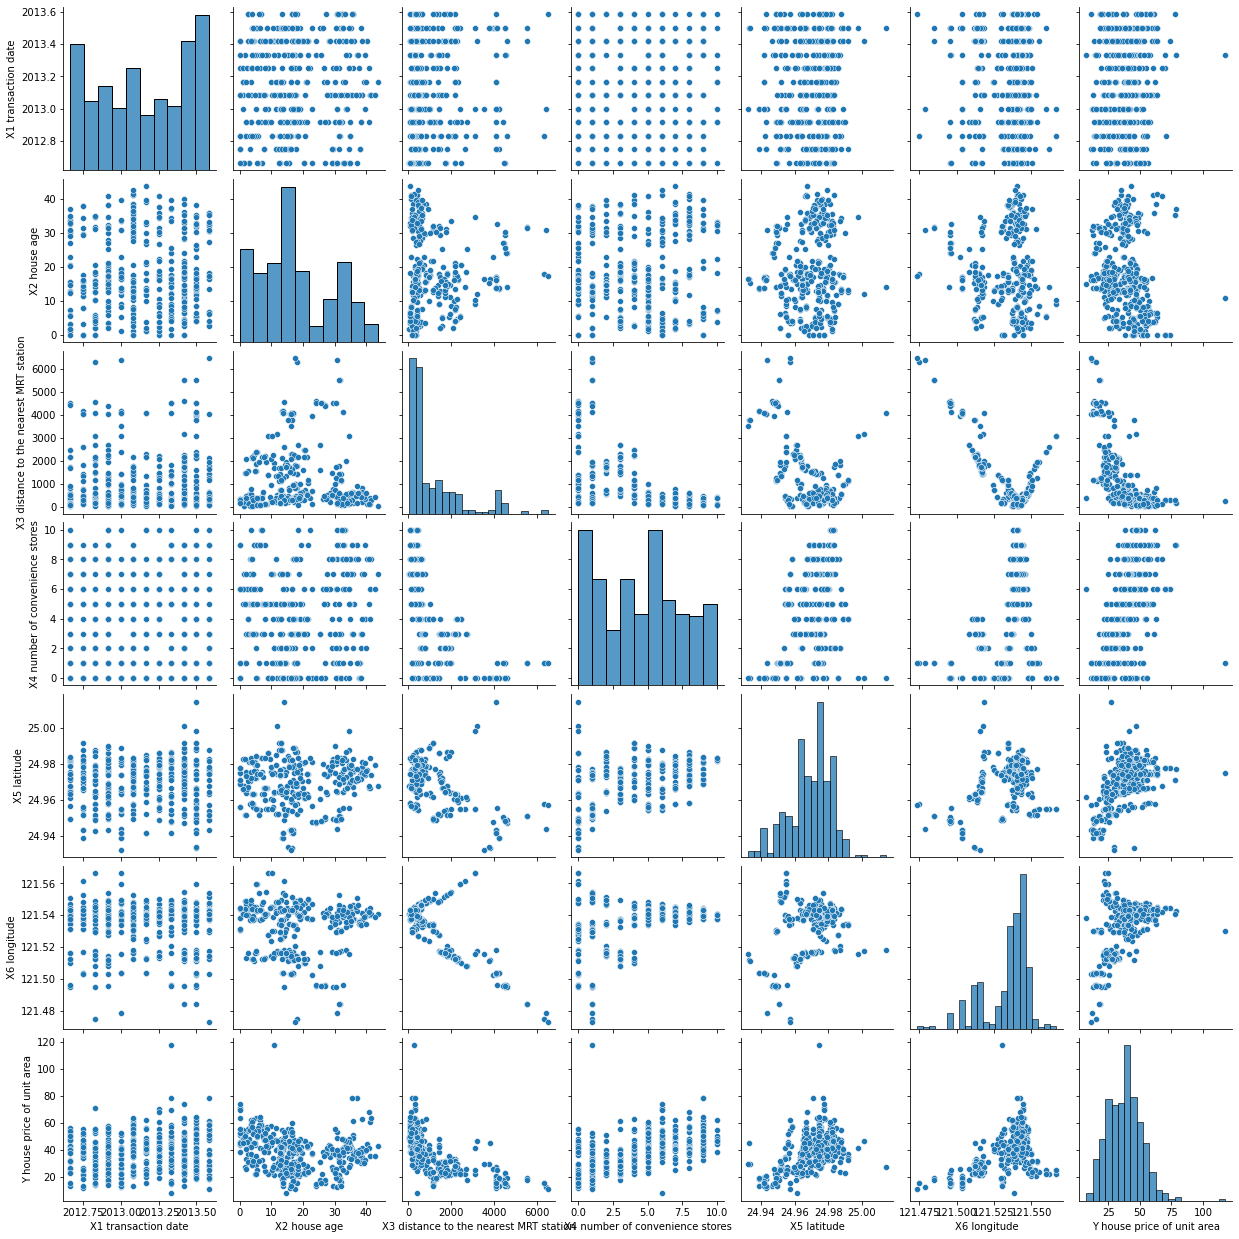

In [6]:
# Plot pairwise relationships in a dataset.
sn.pairplot(df)
plt.show()

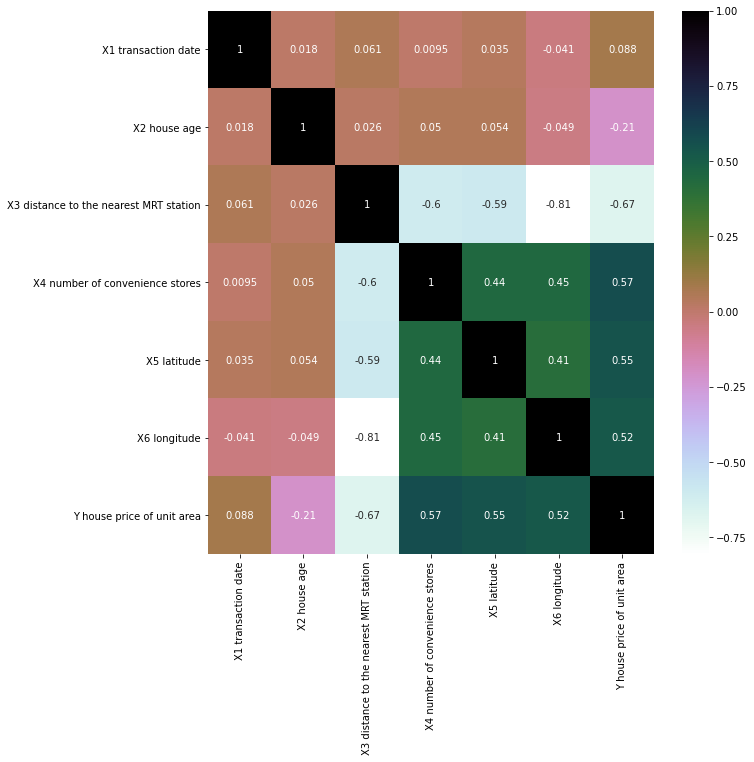

In [7]:
# Correlation map
plt.figure(figsize=(10,10)) 
sn.heatmap(df.corr(),annot=True,cmap='cubehelix_r') 
plt.show()

In [8]:
correlation = df.corr().abs()
s = correlation.unstack()
so = s.sort_values(kind="heapsort", ascending = False)
n = so.drop_duplicates()
n.head(20)

X1 transaction date                     X1 transaction date                       1.000000
X6 longitude                            X3 distance to the nearest MRT station    0.806317
X3 distance to the nearest MRT station  Y house price of unit area                0.673613
                                        X4 number of convenience stores           0.602519
                                        X5 latitude                               0.591067
Y house price of unit area              X4 number of convenience stores           0.571005
X5 latitude                             Y house price of unit area                0.546307
X6 longitude                            Y house price of unit area                0.523287
                                        X4 number of convenience stores           0.449099
X5 latitude                             X4 number of convenience stores           0.444143
                                        X6 longitude                              0.412924

### Some Conclusions

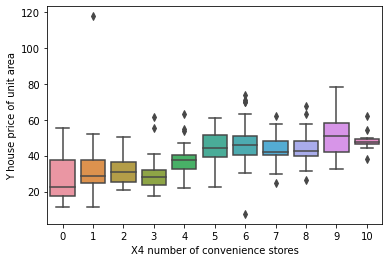

In [9]:
# Number of convenience stores
import seaborn as sns
ax = sns.boxplot(x="X4 number of convenience stores", y="Y house price of unit area", data=df)

- It is possible to observe that Y has considerable relationships with X3, X4, X5 and X6. Furthermore, X3 and X6 also strongly correlated.
- Houses closer to the metro are more expensive
- There exists a slight postive correlation between the price and the location.
- Higher number of convenience stores indicates higher price values
- The Y house price of unit area seems to have a normal distribution with a positive skewness. The average price is 37.980193

### Spliting Data

In [10]:
Y = df['Y house price of unit area']
df = df.drop('Y house price of unit area', axis=1)
X = df.values
n,p = X.shape

In [11]:
# 20% as test size
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [12]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)

### Linear regression

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lin_reg_mod = LinearRegression()
results = lin_reg_mod.fit(X_train, y_train)
pred = lin_reg_mod.predict(X_test)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print('MSE: ', mse)
print('R2: ', r2)
print('Coeficients: ', lin_reg_mod.coef_)

MSE:  66.30126385411857
R2:  0.618297981434238
Coeficients:  [  4.60371955 -11.52517678 -28.85519914  10.9259467   18.60730048
  -0.63229459]


### Ridge Regression

In [14]:
regridge = Ridge()
grid_ridge = {"alpha":np.linspace(0.5,10.5,101).tolist()} 
grid = GridSearchCV(regridge,grid_ridge,cv=10)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1,
                                   1.2000000000000002, 1.3, 1.4, 1.5, 1.6,
                                   1.7000000000000002, 1.8, 1.9000000000000001,
                                   2.0, 2.1, 2.2, 2.3, 2.4000000000000004, 2.5,
                                   2.6, 2.7, 2.8000000000000003,
                                   2.9000000000000004, 3.0, 3.1, 3.2,
                                   3.3000000000000003, 3.4000000000000004, ...]})

In [15]:
regridge = grid.best_estimator_
scores = cross_val_score(regridge, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
np.mean(scores)

-84.96195455873489

In [16]:
y_pred_ridge = grid.predict(X_test)

In [17]:
mse = mean_squared_error(y_test, y_pred_ridge)
r2 = r2_score(y_test, y_pred_ridge)
print('MSE: ', mse)
print('R2: ', r2)

MSE:  64.94113023882224
R2:  0.6261283864114353


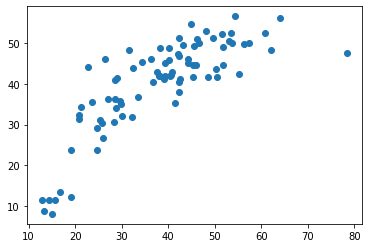

In [18]:
plt.scatter(y_test, y_pred_ridge)

### Lasso Regression

In [19]:
reglasso = Lasso()
grid_lasso = {"alpha":np.linspace(0.5,5.5,51).tolist(),"normalize":[True,False]}
grid = GridSearchCV(reglasso,grid_lasso,cv=10)
grid.fit(X_train,y_train)
print(grid.best_estimator_)

Lasso(alpha=0.5)


In [20]:
reglasso = grid.best_estimator_
scores = cross_val_score(reglasso, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
-np.mean(scores)

101.17120012103123

In [21]:
y_pred_lasso = reglasso.predict(X_test)

In [22]:
mse = mean_squared_error(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred_lasso)
print('MSE: ', mse)
print('R2: ', r2)

MSE:  75.52275771628923
R2:  0.5652090564760802


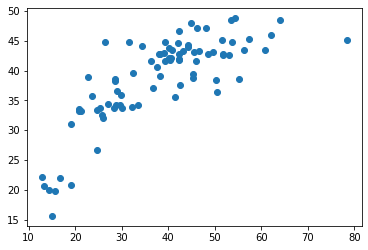

In [23]:
plt.scatter(y_test, y_pred_lasso)

#### Conclusions

For the linear regression methods, there aren't many hyperparameters to be optimized. This kind of model requires treating on the input variables instead of choosing hyperparameters. In these models, we've used GridSearch to find the best alpha values for Ridge and Lasso regressions and evaluated the models by its mean squared error. Ridge regression presented the lower MSE (64.94).

### Random Forest Base

In [24]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0)
# Train the model on training data
rf.fit(X_train, y_train);

In [25]:
# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 51.95816819933401


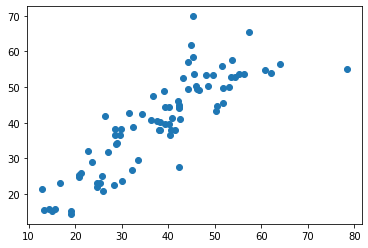

In [26]:
plt.scatter(y_test, y_pred)

### Random Forest with Variable Importance

In [27]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
importances

[0.03772891442844306,
 0.1729363280942826,
 0.5669718287838061,
 0.018713363940685575,
 0.11472818714355183,
 0.08892137760923087]

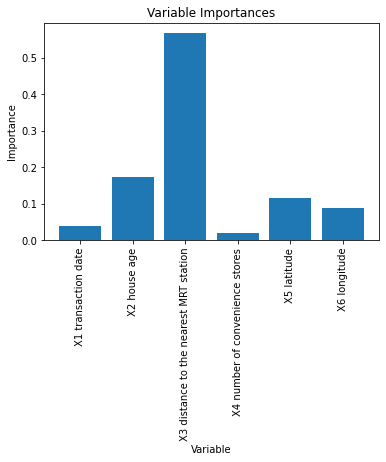

In [28]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, df.columns, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [29]:
# Test with the 4 most important variables

importances = pd.DataFrame(importances, columns = ['Importance'])
rf_most_important = RandomForestRegressor(n_estimators= 500, random_state=42)
to_keep = importances[importances['Importance'] > 0.1].index
X_train_keep = X_train[:,to_keep].copy()
X_test_keep = X_test[:,to_keep].copy()

#Train the random forest
rf_most_important.fit(X_train_keep, y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

In [30]:
y_pred = rf_most_important.predict(X_test_keep)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 63.32912712308249


#### Conlusions

In the base model, with all features, it reached a lower MSE than any regression method. It's not a surprise since usually random forest models have better performance in most machine learning problems. With random forest, it is possible to check the features importances. It allowed us to make a new test filtering features by its importance. The new model with a reduced number of variables didn't present a better performance. 

### XGBoost Random Forest Regression

In this model we use a powerful implementation of the gradient boosting ensemble algorithm. While choosing the model, we changed the number of trees. While increasing the number of trees, it was observed that over nearly 150 trees, the performance of the model stopped improving.

In [31]:
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRFRegressor

# define the model
model = XGBRFRegressor(n_estimators=150, subsample=0.9, colsample_bynode=0.2)
# define the model evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
model.fit(X_train, y_train)
-n_scores.mean()

61.37338364179884

In [32]:
y_pred = model.predict(X_test)

In [33]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('R2: ', r2)

MSE:  46.65292903530969
R2:  0.7314151171542597


#### Conclusion

With XGBoost for Random Forest Regression, it was possible to use a more efficient gradient boosting ensemble algorith. With a better training of the ensemble model, it reached an even better performance of MSE 46.65

### Neural Network

In this section, the process of developing a neural network consisted in searching the best parameters for the network empirically. During this process, it was observed that networks with one hidden layer and small number of neurons performed poorly. The 'linear' activation function was also tested, but it did not improve the model. A network with a reasonable performance was found with two hidden layers as well as 20% droupout in these two layers. Networks with larger number of neurons or hidden layers did not had significant improvement on performance.

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [35]:
input_shape = X_train.shape[1]
input_shape

6

In [36]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(input_shape,)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='relu'),
])

In [37]:
model.compile(optimizer='adam',
              loss='mean_squared_error')

In [38]:
history = model.fit(X_train, y_train, validation_split=0.25,
          epochs=250, batch_size=15)

Epoch 1/250
17/17 [==============================] - 2s 69ms/step - loss: 1645.7892 - val_loss: 1705.3735
Epoch 2/250
17/17 [==============================] - 0s 5ms/step - loss: 1490.9166 - val_loss: 1554.8657
Epoch 3/250
17/17 [==============================] - 0s 5ms/step - loss: 1282.3951 - val_loss: 1260.4429
Epoch 4/250
17/17 [==============================] - 0s 4ms/step - loss: 1106.3304 - val_loss: 791.7719
Epoch 5/250
17/17 [==============================] - 0s 5ms/step - loss: 622.9521 - val_loss: 313.6637
Epoch 6/250
17/17 [==============================] - 0s 5ms/step - loss: 228.4289 - val_loss: 129.1382
Epoch 7/250
17/17 [==============================] - 0s 5ms/step - loss: 138.4551 - val_loss: 118.5819
Epoch 8/250
17/17 [==============================] - 0s 5ms/step - loss: 138.2017 - val_loss: 117.1950
Epoch 9/250
17/17 [==============================] - 0s 5ms/step - loss: 164.1246 - val_loss: 112.6395
Epoch 10/250
17/17 [==============================] - 0s 4ms/step

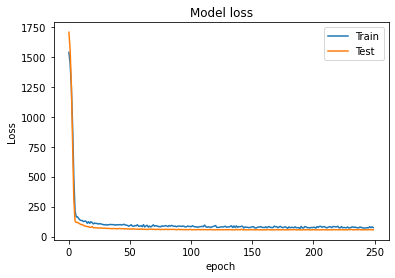

In [39]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [40]:
y_pred = model.predict(X_test)

In [41]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('R2: ', r2)

MSE:  58.4545462747518
R2:  0.663472202332196


#### Conclusion

The neural network had a reasonable performance. It was better than the linear regressions, but worse than the random forest model, even though its results were very close. 

### Overall conclusions

The linear regressions presented the worst performance, probably because of the non-linearity of the data. On the other hand, the random forests, in special, the XGBoost model, presented the best performance. The neural network presented an intermediary performance. It is important to mention that the neural network structure and hyperparameters were optimized empirically, so better models may exist. Besides that, all optimizations were focused on the models and not on the data. A better data treatment certainly could bring better results, but it was not the focus of this project. An example on a data treating would be the latitude and longitude features, they with no doubts have a great importance. Maybe checking these locations distance to big city centers would have a great relevance to the models.
